I sat down and figured out how things should work in the case of \(T\) group assignments - as opposed to just \(2\) groups.

This is a continuation / generalization of [my previous post](https://pkepley.github.io/2016-09-16-Riddler_Draft_Pick/).

# The prompt:
You are one of 30 team owners in a professional sports league. In the past, your league set the order for its annual draft using the teams’ records from the previous season — the team with the worst record got the first draft pick, the team with the second-worst record got the next pick, and so on. However, due to concerns about teams intentionally losing games to improve their picks, the league adopts a modified system. This year, each team tosses a coin. All the teams that call their coin toss correctly go into Group A, and the teams that lost the toss go into Group B. All the Group A teams pick before all the Group B teams; within each group, picks are ordered in the traditional way, from worst record to best. If your team would have picked 10th in the old system, what is your expected draft position under the new system?

Extra credit: Suppose each team is randomly assigned to one of T groups where all the teams in Group 1 pick, then all the teams in Group 2, and so on. (The coin-flipping scenario above is the case where T = 2.) What is the expected draft position of the team with the Nth-best record?

# Analytic Solution:

Some notation:

- \(D_{\text{old}}\) to denote the order we would have been assigned in the old draft, this is 10 in the problem statement, but I'll keep it general 
- \(D\) to represent the draft pick we get in the new system
- \(A_i\) represents both the \(i^{th}\) group and  the event that we are to the \(i^{th}\) group
- \(N\) denotes the total number of teams
- \(T\) denotes the total number of groups  
- \(N_{A_i}\) denotes the number of teams assigned to group \(A_i\)
- \(O_{A_i}\) denotes the pick order we are assigned when we get assigned to group \(i\)
- \(p_i\) denotes the probability of getting assigned to group \(A_i\)


The same reasoning as in the previous post implies that if we are assigned to group \(A_i\),  our order can be found by adding up the number of teams in groups \(A_1,A_2,\ldots, A_{i-1}\) (since they all get to pick before group \(A_i\)) and then adding our order within group \(A_i\).


So we see:
$$
\begin{array}{cl}
    E[D] &= \sum_{i=1}^{T} E[D|A_i] \cdot P_i\\
        &= \sum_{i=1}^{T} (1 + E[O_{A_i}] + \sum_{j = 1}^{i-1} E[N_{A_j}|A_i]) \cdot P_i\\
\end{array}
$$



#### Computing \(E[O_{A_i}]\)

Now, <a href="https://pkepley.github.io/2016-09-16-Riddler_Draft_Pick/#Computing-\(E[O_A]\)-and-\(E[O_B]\)"> like before,</a> we see that \(O_{A_i} \sim \text{Binomial}(D_{\text} - 1, P_i) \), and hence

$$ E[O_{A_i}] = (D_{\text{old}} - 1) \cdot P_i $$

#### Computing \(\sum_{j = 1}^{i-1} E[N_{A_j} | A_i]\).

Now, each team is assigned to group \(A_j\) occurs with probability \(p_i\), so after we have been assigned to group \(A_i\) there are \(N - 1\) remaining teams to be distributed across the remaining groups, and the number of teams assigned to group \(A_j\) will follow a binomial distribution with \(p = p_j\) and \(n = N - 1\). So,

So we once again find that:
$$ E[N_{A_j} | A_i] = (N - 1) \cdot P_j, $$
Thus,
$$ \sum_{j=1}^{i-1} E[N_{A_j} | A_i] = \sum_{j=1}^{i-1} (N - 1) \cdot P_j. $$

### Putting it together:
$$
\begin{array}{cl}
    E[D] &= \sum_{i=1}^{T} E[D|A_i] \cdot P_i\\
        &= \sum_{i=1}^{T} P_i (1 + (D_{\text{old}} - 1) P_i + \sum_{j=1}^{i-1} (N - 1) \cdot P_j)\\
        &= 1 + (D_{\text{old}} - 1) \sum_{i=1}^T P_i^2  + (N - 1) \sum_{i=1}^{T} \sum_{j=1}^{i-1}  P_i P_j\\
\end{array}
$$



### Extra credit Riddler solution (the case of a fair \(T\) sided "coin"):

In this case, \(P_i = 1/T\) for all \(i\) so the expression above simplifies:

$$
\begin{array}{cl}
    E[D] &= 1 + (D_{\text{old}} - 1) \sum_{i=1}^T (1/T)^2  + (N - 1) \sum_{i=1}^{T} \sum_{j=1}^{i-1}  (1/T)^2\\
    &= 1 + (D_{\text{old}} - 1) \cdot (1/T)  + (N - 1)/T^2 \cdot \sum_{i=1}^{T} (i-1)\\
    &= 1 + (D_{\text{old}} - 1) \cdot (1/T)  + (N - 1)/T^2 \cdot (T  \cdot (T-1))/2\\
\end{array}
$$


That is,
$$
E[D] = 1 + \frac{D_{\text{old}} - 1}{T}  + \frac{N - 1}{2} \left(1 - \frac{1}{T}\right)
$$


# Simulation:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Implement the analytical solution described above, just for the fair coin.

In [2]:
def analytical_solution(T, order=10, n_teams = 30):    
    # order is D_old
    # n_teams is N

    return 1 + ((order - 1.0)/T) + ((n_teams-1)/2.0) * (1- 1.0/T)

Let's quickly check that everything works out as before when we consider the \(T = 2\) case.

In [3]:
analytical_solution(T = 2, order = 10, n_teams=30)

12.75

Note that this agrees with our <a href="https://pkepley.github.io/2016-09-16-Riddler_Draft_Pick/#Solution-to-the-Riddler-(no-extra-credit):"> previous computation </a>

Now we'll simulate the process as a sanity check for the solution given above.

In [4]:
def simulate(T, n_runs, n_teams=30, order=10):
    draft_position = np.zeros(n_runs)    
    
    # only call the random number generator once:
    rvs = np.random.random_integers(1, T, n_teams * n_runs)

    # reshape to get all n_runs:
    rvs = np.reshape(rvs, (n_runs,n_teams))

    for idx in range(n_runs):
        # what is our assignment?
        assignment = rvs[idx, order - 1]

        # how many teams below us were assigned to lower number groups?
        n_lower_assignments = len(np.where(rvs[idx,:] < assignment)[0])
        
        # how many teams with lower order than ours are in our group?
        n_lower_in_group = len(np.where(rvs[idx,0:order-1] == assignment)[0])
               
        draft_position[idx] = 1 + n_lower_assignments + n_lower_in_group
    return draft_position    


Wrap comparisions up into a nice tidy little function:

In [5]:
def print_comparision(T, n_runs = 10000, order = 10, n_teams=30):
    simulated_draft_position = np.mean(simulate(T, n_runs, n_teams=n_teams, order=order))
    analytical_draft_position = analytical_solution(T, order=order, n_teams=n_teams)

    print 'T = {0}'.format(T)
    print 'Expected draft position (simulated) : {0}'.format(simulated_draft_position)
    print 'Expected draft position (analytical): {0}'.format(analytical_draft_position)

Let's check that our analytical results agree with our simulations.

In [6]:
for T in range(2,11):
    print_comparision(T, n_runs = 100000)

T = 2
Expected draft position (simulated) : 12.74021
Expected draft position (analytical): 12.75
T = 3
Expected draft position (simulated) : 13.62009
Expected draft position (analytical): 13.6666666667
T = 4
Expected draft position (simulated) : 14.13053
Expected draft position (analytical): 14.125
T = 5
Expected draft position (simulated) : 14.46331
Expected draft position (analytical): 14.4
T = 6
Expected draft position (simulated) : 14.56901
Expected draft position (analytical): 14.5833333333
T = 7
Expected draft position (simulated) : 14.72993
Expected draft position (analytical): 14.7142857143
T = 8
Expected draft position (simulated) : 14.83664
Expected draft position (analytical): 14.8125
T = 9
Expected draft position (simulated) : 14.8764
Expected draft position (analytical): 14.8888888889
T = 10
Expected draft position (simulated) : 14.94364
Expected draft position (analytical): 14.95


Good! Our computations seem to agree with our analytical results pretty well.

# Examining the distribution of draft picks:

Let's check out the draft pick distribution changes when we change \(T\) while keeping our draft order at  \(D_\{text{old}} = 10\) and the number of teams \(N = 30\) constant. 

We'll simulate a lot of draft picks for each \(T\) and plot the corresponding histograms.

In [7]:
def plot_distribution(T, n_runs=10000, n_teams = 30, order = 10):
    draft_position = simulate(T, n_runs, n_teams=n_teams, order=order)    
    plt.hist(draft_position, bins= n_teams, range=[1,n_teams], alpha = 0.5)
    plt.title('Histogram of Draft Pick Frequencies (T = {0})'.format(T));
    plt.xlabel('Draft Pick');
    plt.ylabel('Frequency (count)');    

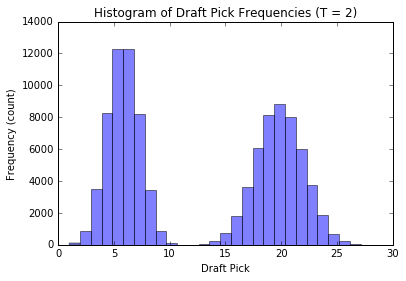

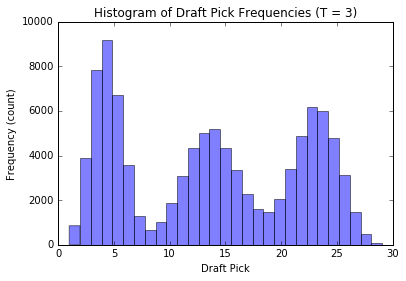

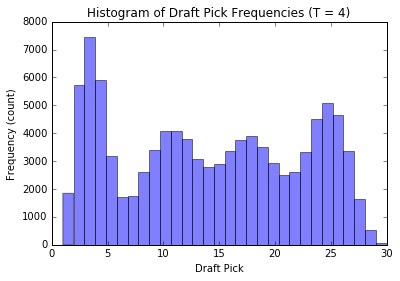

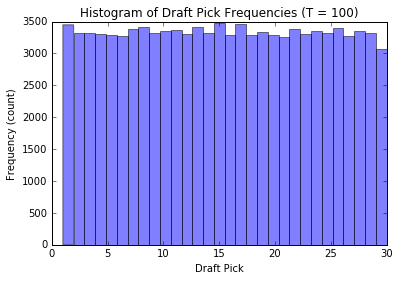

In [8]:
plot_distribution(2, n_runs = 100000); plt.show();
plot_distribution(3, n_runs = 100000); plt.show();
plot_distribution(4, n_runs = 100000); plt.show();
plot_distribution(100, n_runs = 100000); plt.show()

We see that when there are \(T\) groups, the histogram essentially follows a \(T\) modal distribution (see analytic discussion above, this is not unexpected, the reasoning is similar to our <a href="https://pkepley.github.io/2016-09-16-Riddler_Draft_Pick/#Examining-the-draft-position-distribution:">observations from before</a>). Also, as \(T\) gets large the distribution of picks tends toward a uniform distribution. Basically, the more groups to distribute the teams in, the less effect the old-style ordering has on the outcome.